In [ ]:
conda install scikit-learn==0.23.1

In [1]:
import pandas as pd

dt1 = pd.read_csv('../DATA_P/야외와이파이지수.csv')
dt1 = pd.DataFrame(dt1)
dt2 = pd.read_csv('../DATA_P/공공설치지수.csv')
dt2 = pd.DataFrame(dt2)

dt1 = dt1.sort_values('행정동')
dt2 = dt2.sort_values('행정동')

dt = pd.DataFrame()

In [10]:
dt1.head()

,Unnamed: 0,행정동,와이파이 수,실외 와이파이 비율,정보화지수,전체인구,평균소득,와이파이 설치 지수
0,0,가양1동,220,0.713636,1.069123,0.000029,5697.585000,50.913846
1,1,가양2동,47,0.382979,1.464203,0.000071,5241.120000,57.194162
2,2,가양3동,48,0.541667,1.328417,0.000066,5241.120000,52.796799
3,3,공항동,67,0.835821,1.138855,0.000032,4350.476667,27.100060
4,4,등촌1동,46,0.739130,1.090913,0.000041,5654.740000,40.236936


In [2]:
dt['행정동']=dt1['행정동']
dt['공공설치물 지수']=dt2['공공설치물 지수']
dt['와이파이 설치 지수'] = dt1['와이파이 설치 지수']

In [3]:
from sklearn.preprocessing import MinMaxScaler
d = dt[['공공설치물 지수','와이파이 설치 지수']]
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(d)


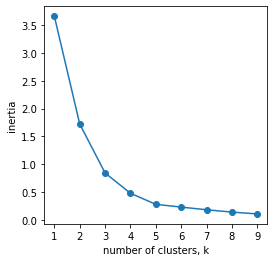

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# import yellowbrick.cluster
ks = range(1,10)
inertias = []
for k in ks : 
    model = KMeans(n_clusters=k)
    model.fit(data_scale)
    inertias.append(model.inertia_)
plt.figure(figsize=(4, 4)) 
plt.plot(ks, inertias, '-o') 
plt.xlabel('number of clusters, k') 
plt.ylabel('inertia') 
plt.xticks(ks) 
plt.show()
# k 개수가 4에서 완만하게 변하므로 군집을 4개로 설정.

In [17]:
#군집화 실시
kmeans = KMeans(n_clusters=4)
cluster_data = kmeans.fit_transform(data_scale)
l = kmeans.labels_
li = []
for i in l : 
    li.append(i)
dt['군집화 결과'] = li

kmeans.cluster_centers_
# zero = []
# one = []
# two = []
# three = []

# for i in range(len(dt)):
#     d = dt['군집화 결과'][i]
#     if d == 0 :
#         zero.append(i)
#     elif d == 1 :
#         one.append(i)
#     elif d == 2 : 
#         two.append(i)
#     else : 
#         three.append(i)



array([[0.18590861, 0.28505893],
       [0.57245777, 0.68371871],
       [0.82362164, 0.07960965],
       [0.11833827, 0.87564022]])

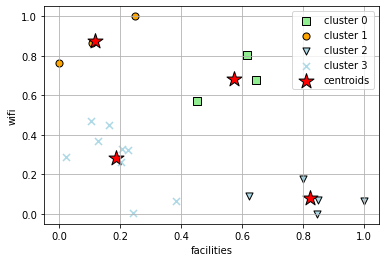

In [33]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(data_scale)
X = data_scale

plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 0'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='lightblue',
    marker='x', edgecolor='black',
    label='cluster 3'
)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.xlabel('facilities')
plt.ylabel('wifi')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [24]:
dt['군집화 결과'] = y_km
dt

,행정동,공공설치물 지수,와이파이 설치 지수,군집화 결과
0,가양1동,0.397891,50.913846,0
1,가양2동,0.207057,57.194162,1
2,가양3동,0.134218,52.796799,1
3,공항동,0.595888,27.100060,2
4,등촌1동,0.133195,40.236936,3
5,등촌2동,0.078862,49.608364,1
6,등촌3동,0.413324,46.810147,0
7,발산1동,0.313297,43.382002,0
8,방화1동,0.492203,30.702113,2
9,방화2동,0.162885,39.578040,3


In [58]:
import numpy as np
dt.sort_values('군집화 결과')
l  = list(dt[dt['군집화 결과'] == 3]['와이파이 설치 지수'])
round(np.mean(l),3)


34.231

In [69]:
import folium
with open('../DATA/korea.geojson','r',encoding='UTF-8') as fp :
    geo_data = fp.read()
center = [37.554465228435177 ,126.883166284349187]
m = folium.Map(location=center, zoom_start=12)
folium.Choropleth(
    geo_data=geo_data,
    data=dt,
    columns=('행정동', '와이파이 설치 지수'),
    key_on='feature.properties.emd_nm',
    fill_color='Reds',
    legend_name='야외 와이파이',
).add_to(m)
m.save('test.html')